## Predicting Diabetes From Medical Records

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. 

The Pima Indians Diabetes Database can be used to train machine learning models to predict if a given patient has diabetes. This dataset contains measurements relating to Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.

The dataset link https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Importing important Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Embedding, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display, clear_output
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer
warnings.filterwarnings('ignore')

Loading the Dataset

In [2]:
df=pd.read_csv("diabetes.csv")

Displaying first 5 rows

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Displaying the number of rows and Columns

In [4]:
df.shape

(768, 9)

Displaying the Columns

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Displaying Column data types and info

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Displaying statistical data on the dataset

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Dropping duplicate columns

In [9]:
df=df.drop_duplicates()

Removing and Displaying null values

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking for 0 value and replacing it

In [11]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


Replacing 0 values with median of that column

In [12]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

Visualizing the target column

<Axes: xlabel='Outcome', ylabel='count'>

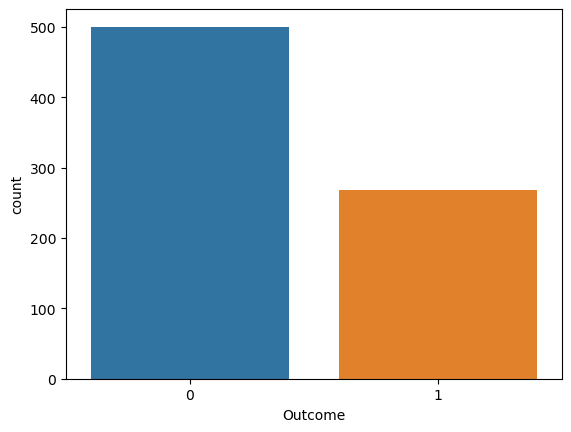

In [13]:
sns.countplot(x='Outcome', data=df)

Histogram for each feature

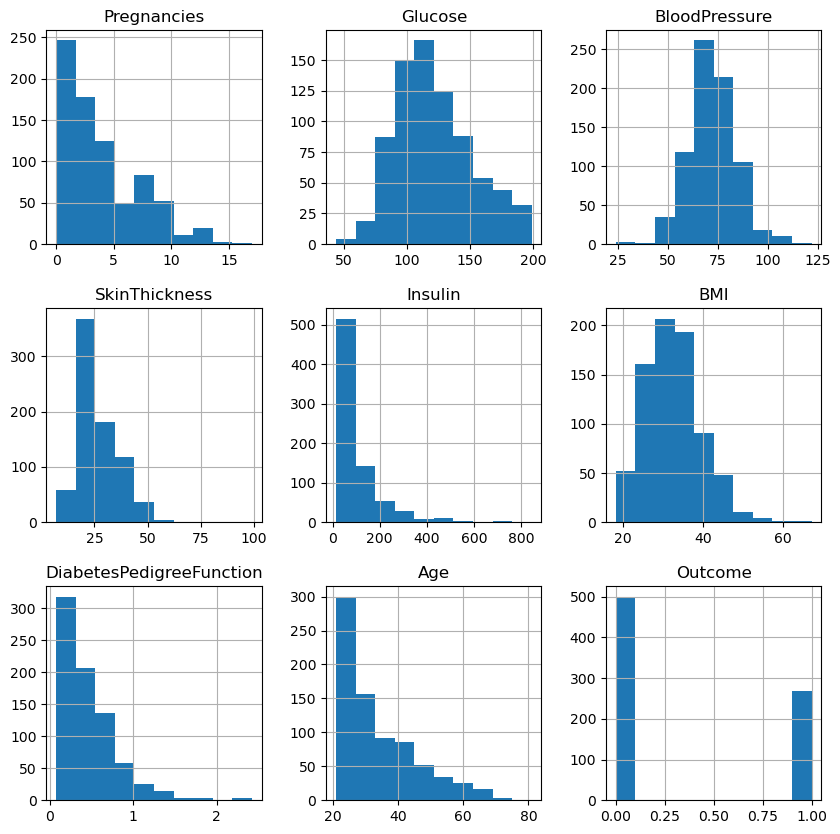

In [14]:
df.hist(bins=10,figsize=(10,10))
plt.show()

Visualizing the data

<Axes: xlabel='DiabetesPedigreeFunction'>

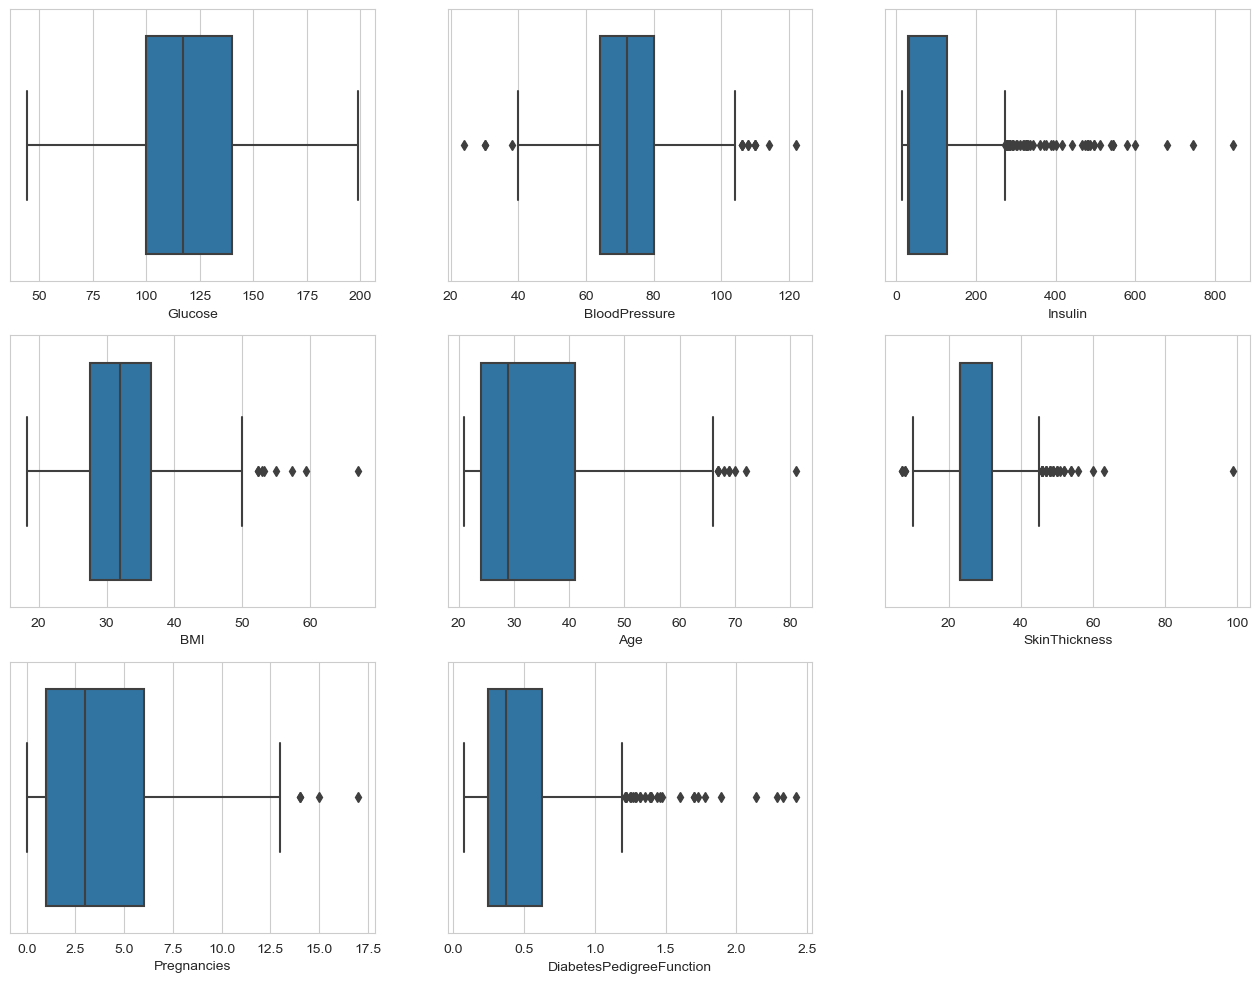

In [15]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

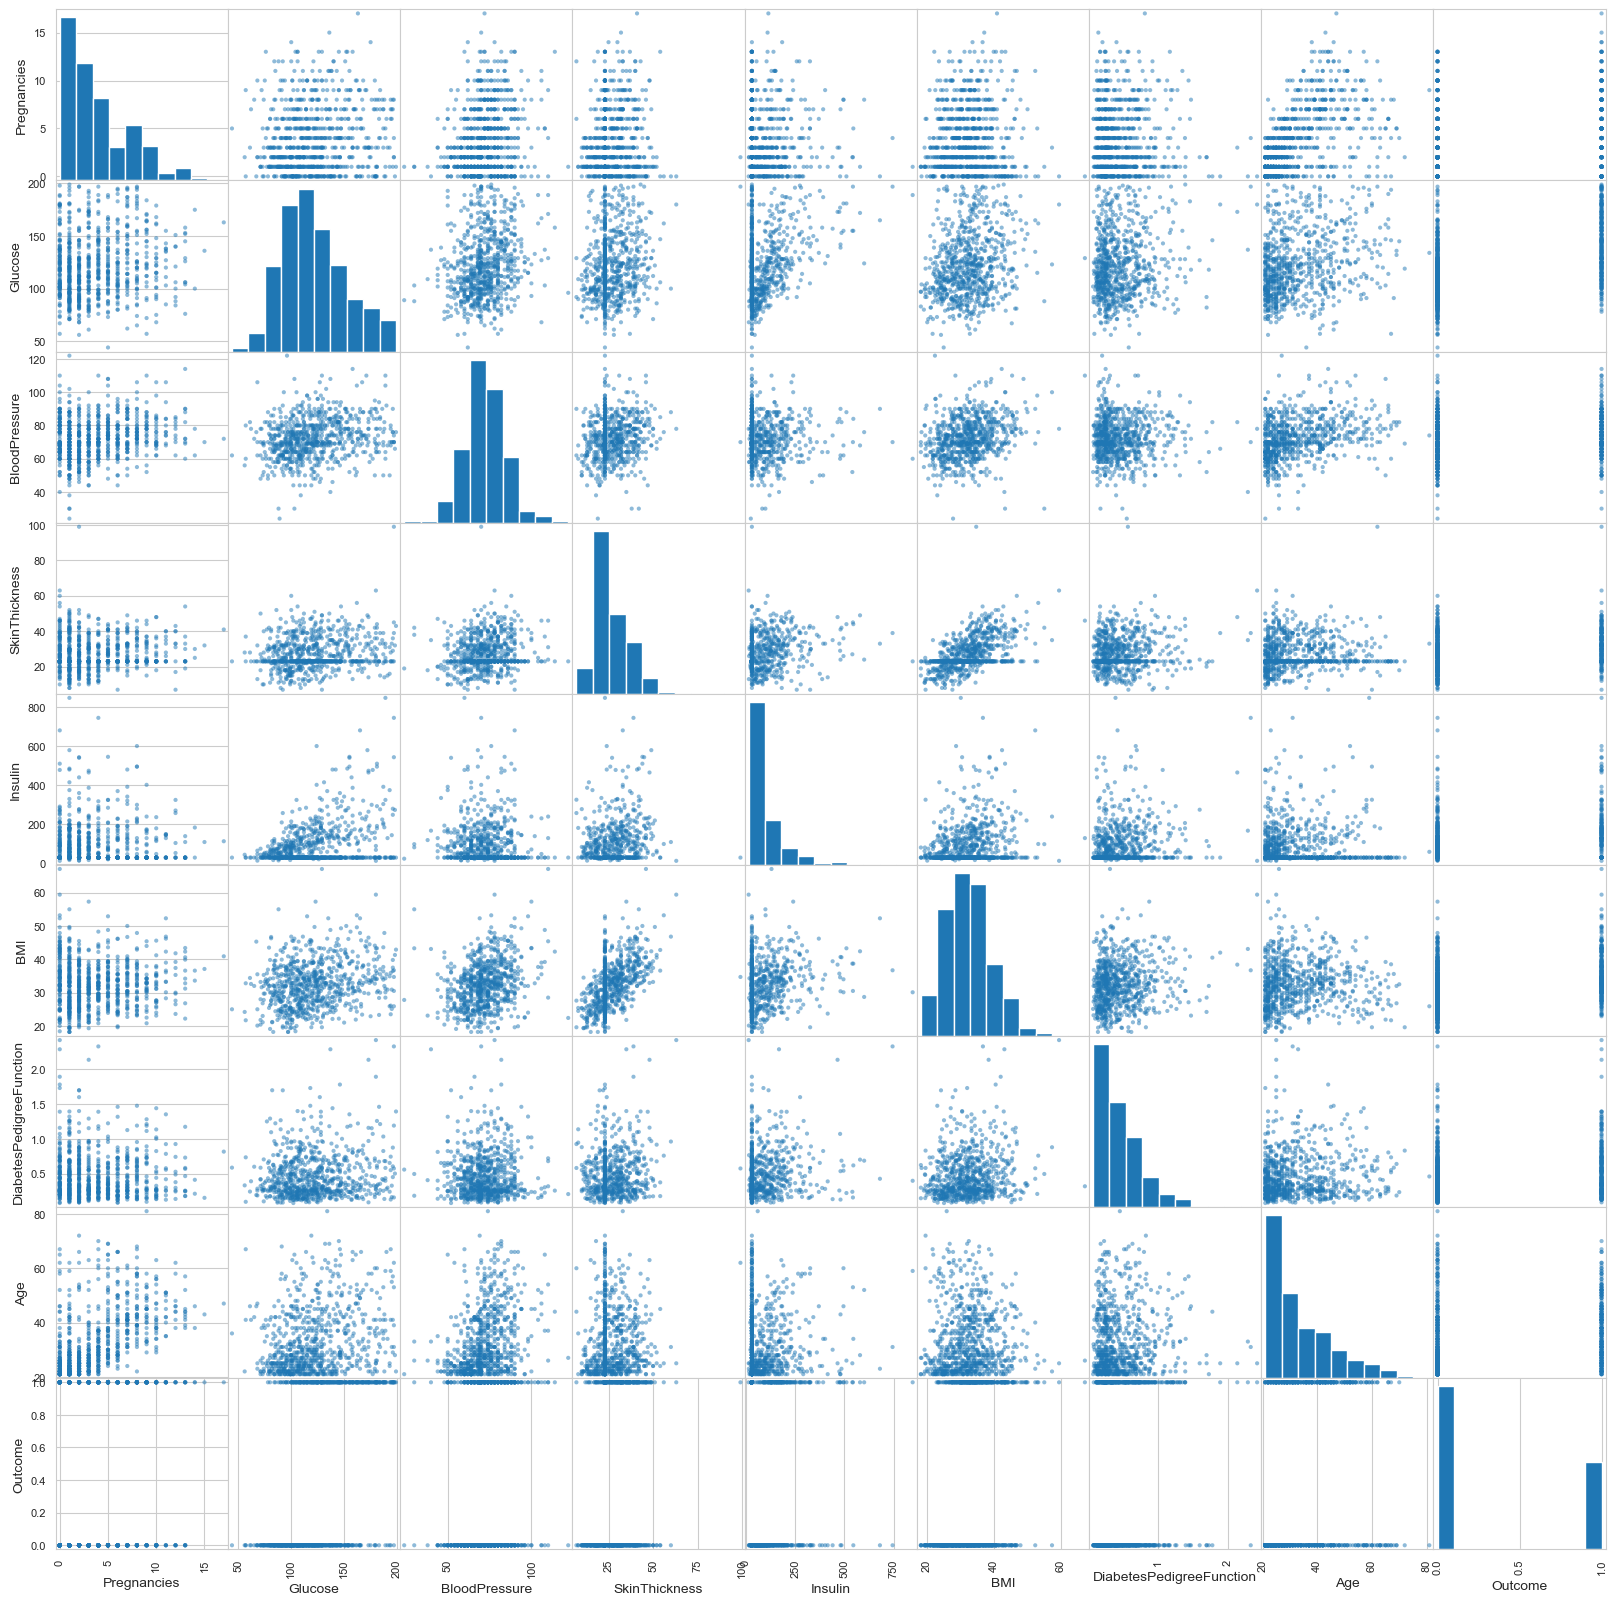

In [16]:
scatter_matrix(df,figsize=(20,20));

Displaying the correlation

<Axes: >

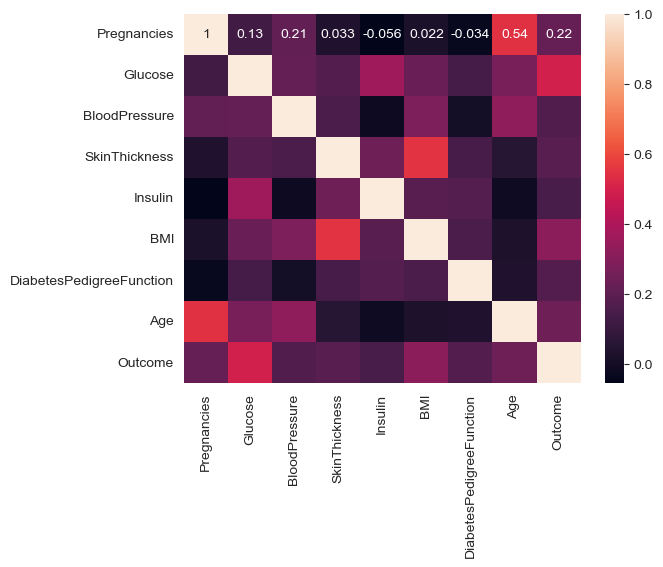

In [17]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

Dropping unnecessary columns

In [18]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

Mapping the data to be uniform

In [19]:
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

Pregnancies   Glucose  SkinThickness       BMI       Age  Outcome
0     0.747718  0.810300       0.801825  0.591265  0.889831      1.0
1     0.232725  0.091265       0.644720  0.213168  0.558670      0.0
2     0.863755  0.956975       0.357888  0.077575  0.585398      1.0
3     0.232725  0.124511       0.357888  0.284224  0.000000      0.0
4     0.000000  0.721643       0.801825  0.926988  0.606258      1.0

Visualizing the chosen Columns

<Axes: xlabel='SkinThickness'>

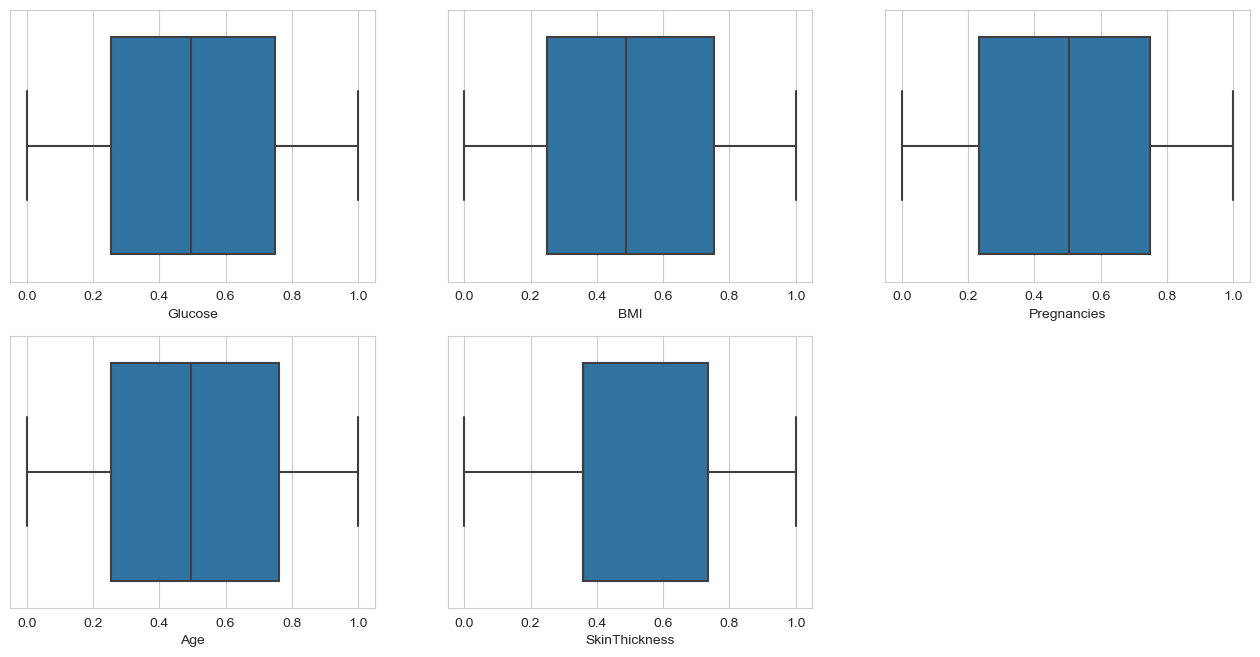

In [20]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

Split the Data Frame into X and y

In [21]:
target_name='Outcome'
y= df_new[target_name]
X=df_new.drop(target_name,axis=1)

In [22]:
X.head()

Pregnancies   Glucose  SkinThickness       BMI       Age
0     0.747718  0.810300       0.801825  0.591265  0.889831
1     0.232725  0.091265       0.644720  0.213168  0.558670
2     0.863755  0.956975       0.357888  0.077575  0.585398
3     0.232725  0.124511       0.357888  0.284224  0.000000
4     0.000000  0.721643       0.801825  0.926988  0.606258

In [23]:
y.head() 

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [26]:
X_test.shape,y_test.shape

((154, 5), (154,))

Classification Algorithms

Random Forest

In [27]:
# Initialize lists to store metrics for each fold
tp_list, tn_list, fp_list, fn_list = [], [], [], []
tss_list, hss_list = [], []
f1_list, accuracy_list = [], []

# Perform 10-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
fold_num = 1

# Create lists to store results for tabular format
fold_results = []
overall_results = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_fold, y_train_fold)
    
    # Predict labels
    y_pred_fold = rf.predict(X_test_fold)
    
    # Calculate confusion matrix
    confusion = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = confusion.ravel()
    tp_list.append(tp)
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    
    # Calculate F1 score and accuracy
    f1 = f1_score(y_test_fold, y_pred_fold)
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    
    # Calculate TSS and HSS for this fold
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
    tss_list.append(tss)
    hss_list.append(hss)
    
    
    # Store results for tabular format
    fold_results.append([fold_num, tp, tn, fp, fn, tss, hss, f1, accuracy])
    fold_num += 1

# Calculate overall statistics
overall_tp = np.mean(tp_list)
overall_tn = np.mean(tn_list)
overall_fp = np.mean(fp_list)
overall_fn = np.mean(fn_list)

# Calculate overall TSS, HSS, F1 score, and accuracy
overall_tss = np.mean(tss_list)
overall_hss = np.mean(hss_list)
overall_f1 = np.mean(f1_list)
overall_accuracy = np.mean(accuracy_list)

# Store overall results for tabular format
overall_results.append(["Average", overall_tp, overall_tn, overall_fp, overall_fn, overall_tss, overall_hss, overall_f1, overall_accuracy])

# Print results in tabular format
clear_output(wait=True)
print("\nResults Table:")
print(tabulate(fold_results + overall_results, headers=["Fold", "TP", "TN", "FP", "FN", "TSS", "HSS", "F1 Score", "Accuracy"], tablefmt="grid"))



Results Table:
+---------+---------+------+------+----------+----------+----------+------------+------------+
| Fold    |      TP |   TN |   FP |       FN |      TSS |      HSS |   F1 Score |   Accuracy |
+=========+=========+======+======+==========+==========+==========+============+============+
| 1       | 16      |   29 | 10   |  7       | 0.439242 | 0.427796 |   0.653061 |   0.725806 |
+---------+---------+------+------+----------+----------+----------+------------+------------+
| 2       | 11      |   32 |  8   | 11       | 0.3      | 0.309496 |   0.536585 |   0.693548 |
+---------+---------+------+------+----------+----------+----------+------------+------------+
| 3       | 14      |   36 |  4   |  8       | 0.536364 | 0.559242 |   0.7      |   0.806452 |
+---------+---------+------+------+----------+----------+----------+------------+------------+
| 4       | 13      |   32 |  8   |  9       | 0.390909 | 0.394948 |   0.604651 |   0.725806 |
+---------+---------+------+------

KNN

In [28]:
# Initialize lists to store metrics for each fold
tp_list, tn_list, fp_list, fn_list = [], [], [], []
tss_list, hss_list = [], []
f1_list, accuracy_list = [], []

# Perform 10-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
fold_num = 1

# Create lists to store results for tabular format
fold_results = []
overall_results = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit the model
    knn = KNeighborsClassifier(n_neighbors=5)  # Example: using 5 neighbors
    knn.fit(X_train_fold, y_train_fold)
    
    # Predict labels
    y_pred_fold = knn.predict(X_test_fold)
    
    # Calculate confusion matrix
    confusion = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = confusion.ravel()
    tp_list.append(tp)
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    
    # Calculate F1 score and accuracy
    f1 = f1_score(y_test_fold, y_pred_fold)
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    
    # Calculate TSS and HSS for this fold
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
    tss_list.append(tss)
    hss_list.append(hss)
    
    
    # Store results for tabular format
    fold_results.append([fold_num, tp, tn, fp, fn, tss, hss, f1, accuracy])
    fold_num += 1

# Calculate overall statistics
overall_tp = np.mean(tp_list)
overall_tn = np.mean(tn_list)
overall_fp = np.mean(fp_list)
overall_fn = np.mean(fn_list)

# Calculate overall TSS, HSS, F1 score, and accuracy
overall_tss = np.mean(tss_list)
overall_hss = np.mean(hss_list)
overall_f1 = np.mean(f1_list)
overall_accuracy = np.mean(accuracy_list)

# Store overall results for tabular format
overall_results.append(["Average", overall_tp, overall_tn, overall_fp, overall_fn, overall_tss, overall_hss, overall_f1, overall_accuracy])

# Print results in tabular format
clear_output(wait=True)
print("\nResults Table:")
print(tabulate(fold_results + overall_results, headers=["Fold", "TP", "TN", "FP", "FN", "TSS", "HSS", "F1 Score", "Accuracy"], tablefmt="grid"))



Results Table:
+---------+---------+---------+----------+----------+----------+----------+------------+------------+
| Fold    |      TP |      TN |       FP |       FN |      TSS |      HSS |   F1 Score |   Accuracy |
+=========+=========+=========+==========+==========+==========+==========+============+============+
| 1       | 17      | 30      |  9       |  6       | 0.508361 | 0.495114 |   0.693878 |   0.758065 |
+---------+---------+---------+----------+----------+----------+----------+------------+------------+
| 2       | 12      | 32      |  8       | 10       | 0.345455 | 0.352668 |   0.571429 |   0.709677 |
+---------+---------+---------+----------+----------+----------+----------+------------+------------+
| 3       | 12      | 30      | 10       | 10       | 0.295455 | 0.295455 |   0.545455 |   0.677419 |
+---------+---------+---------+----------+----------+----------+----------+------------+------------+
| 4       | 15      | 32      |  8       |  7       | 0.481818 | 0

Deep Learning

Bidirectional LSTM

In [29]:
# Load the dataset
data = pd.read_csv("diabetes.csv")

# Select the features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Perform one-hot encoding for categorical features
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X.iloc[:, [1, 2, 3, 4, 5]])

# Concatenate the encoded features with the numerical ones
X_numerical = X.drop(X.columns[[1, 2, 3, 4, 5]], axis=1)
X_concatenated = np.concatenate((X_encoded, X_numerical), axis=1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_concatenated, y, test_size=0.2, random_state=42)

# Now you can use X_train and y_train in the BLSTM model

# Define your BLSTM model
def create_blstm_model(input_dim, output_dim, maxlen):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=128))  # Remove input_length argument
    model.add(SpatialDropout1D(0.2))
    model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(output_dim, activation='sigmoid'))  # Use sigmoid activation for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Initialize lists to store metrics for each fold
tp_list, tn_list, fp_list, fn_list = [], [], [], []
tss_list, hss_list = [], []
f1_list, accuracy_list = [], []

# Perform 10-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
fold_num = 1

# Create lists to store results for tabular format
fold_results = []
overall_results = []

for train_index, test_index in cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Pad sequences to ensure uniform input length
    maxlen = X_train_fold.shape[1]  # Set the maximum sequence length
    X_train_padded = pad_sequences(X_train_fold, maxlen=maxlen)
    X_test_padded = pad_sequences(X_test_fold, maxlen=maxlen)
    
    # Define and train the BLSTM model
    blstm_model = create_blstm_model(input_dim=X_train_fold.shape[1], output_dim=1, maxlen=maxlen)  # output_dim=1 for binary classification
    blstm_model.fit(X_train_padded, y_train_fold, batch_size=32, epochs=5, verbose=0)
    
    # Evaluate the model
    y_pred_fold = np.round(blstm_model.predict(X_test_padded))  # Round predictions to 0 or 1
    
    # Calculate confusion matrix
    confusion = confusion_matrix(y_test_fold, y_pred_fold)
    tn, fp, fn, tp = confusion.ravel()
    tp_list.append(tp)
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    
    # Calculate F1 score and accuracy
    f1 = f1_score(y_test_fold, y_pred_fold)
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    f1_list.append(f1)
    accuracy_list.append(accuracy)
    
    # Calculate TSS and HSS for this fold
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
    tss_list.append(tss)
    hss_list.append(hss)
    
    # Print results for this fold
    fold_results.append([fold_num, tp, tn, fp, fn, tss, hss, f1, accuracy])
    fold_num += 1
    
    # Calculate overall statistics
    overall_tp = np.mean(tp_list)
    overall_tn = np.mean(tn_list)
    overall_fp = np.mean(fp_list)
    overall_fn = np.mean(fn_list)

    # Calculate overall TSS, HSS, F1 score, and accuracy
    overall_tss = np.mean(tss_list)
    overall_hss = np.mean(hss_list)
    overall_f1 = np.mean(f1_list)
    overall_accuracy = np.mean(accuracy_list)

    # Store overall results for tabular format
    overall_results = [["Average", overall_tp, overall_tn, overall_fp,overall_fn,overall_tss, overall_hss, overall_f1, overall_accuracy]]

    # Print results in tabular format
    clear_output(wait=True)
    print("\nResults Table:")
    print(tabulate(fold_results + overall_results, headers=["Fold", "TP", "TN", "FP", "FN", "TSS", "HSS", "F1 Score", "Accuracy"], tablefmt="grid"))



Results Table:
+---------+---------+---------+----------+---------+-------------+-------------+------------+------------+
| Fold    |      TP |      TN |       FP |      FN |         TSS |         HSS |   F1 Score |   Accuracy |
+=========+=========+=========+==========+=========+=============+=============+============+============+
| 1       | 2       | 39      | 2        | 19      |  0.0464576  |  0.0578871  |  0.16      |   0.66129  |
+---------+---------+---------+----------+---------+-------------+-------------+------------+------------+
| 2       | 1       | 40      | 0        | 21      |  0.0454545  |  0.0578871  |  0.0869565 |   0.66129  |
+---------+---------+---------+----------+---------+-------------+-------------+------------+------------+
| 3       | 0       | 40      | 0        | 22      |  0          |  0          |  0         |   0.645161 |
+---------+---------+---------+----------+---------+-------------+-------------+------------+------------+
| 4       | 3       |

Conclusion

In this project, I was able to come up with models that can be used to predict diabetes from medical records. The algorithms used are KNN, Bidirectional LSTM, and random Forest which had the highest accuracy of 0.73.

Some of the reasons why Random Forest might have performed better than KNN and Bidirectional Long Short Term Memory is because Random Forest works well with data that tends to have high dimensionality, noisy, and outliers. This is because it constructs multiple decision trees and aggregates their predictions, reducing the impact of individual noisy data points. 